In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
%matplotlib notebook

In [100]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [17]:
gdpdata = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")
lifedata = pd.read_csv("data/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
populationdata = pd.read_csv("data/ddf--datapoints--population_total--by--geo--time.csv")

gdpdata.dropna(inplace = True)
lifedata.dropna(inplace = True)
populationdata.dropna(inplace = True)

In [90]:
data = pd.merge(gdpdata, lifedata, on = ["geo", "time"], how = "inner" )
data = pd.merge(data, populationdata, on = ["geo", "time"], how = "inner")

In [109]:
data["gdp_total"] = data["gdppercapita_us_inflation_adjusted"]*data["population_total"]
data["life_total"] = data["life_expectancy_years"] * data["population_total"]
grouped_data = data[["time", "gdp_total", "life_total","population_total"]].groupby("time").sum()
grouped_data["life_avg"] = grouped_data["life_total"] / grouped_data["population_total"]
grouped_data["gdp_avg"] = grouped_data["gdp_total"] / grouped_data["population_total"]

In [110]:
grouped_data.head(5)

,gdp_total,life_total,population_total,life_avg,gdp_avg
time,,,,,
1960,9.104672e+12,1.158298e+11,2411234555,48.037548,3775.937939
1961,9.498389e+12,1.214688e+11,2470767875,49.162377,3844.306631
1962,1.002300e+13,1.314901e+11,2519054144,52.198192,3978.875693
1963,1.054055e+13,1.399572e+11,2569354786,54.471729,4102.409690
1964,1.123669e+13,1.448578e+11,2622052707,55.245941,4285.456132


<IPython.core.display.Javascript object>


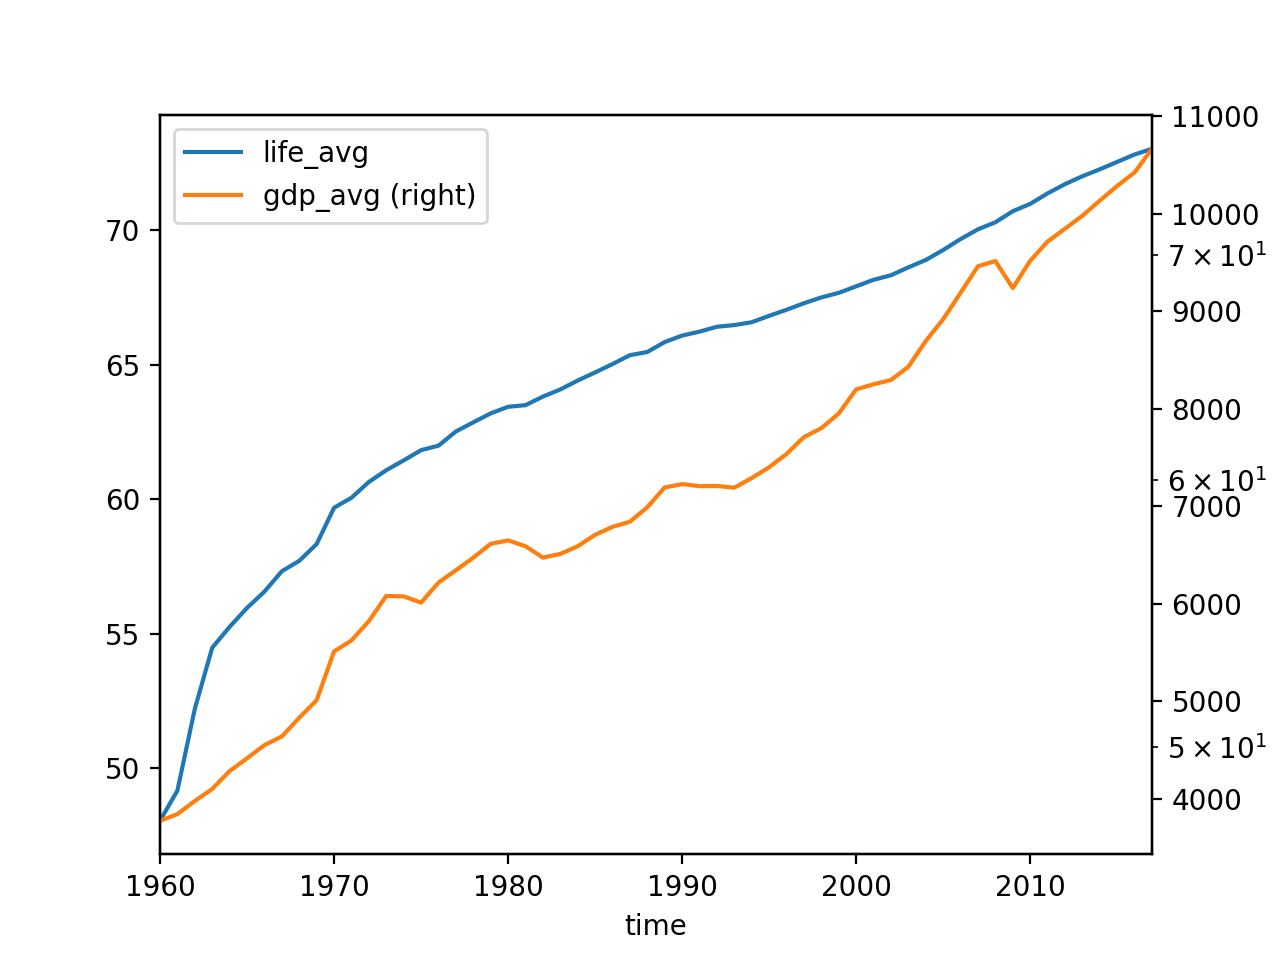

In [97]:
plot_data = grouped_data[["life_avg", "gdp_avg"]]
ax = plot_data.plot(secondary_y='gdp_avg')
ax2 = ax.twinx()
ax2.set_yscale('log')

In [103]:
X = grouped_data["gdp_avg"].values.reshape(-1, 1)
Y = grouped_data["life_avg"].values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


<IPython.core.display.Javascript object>


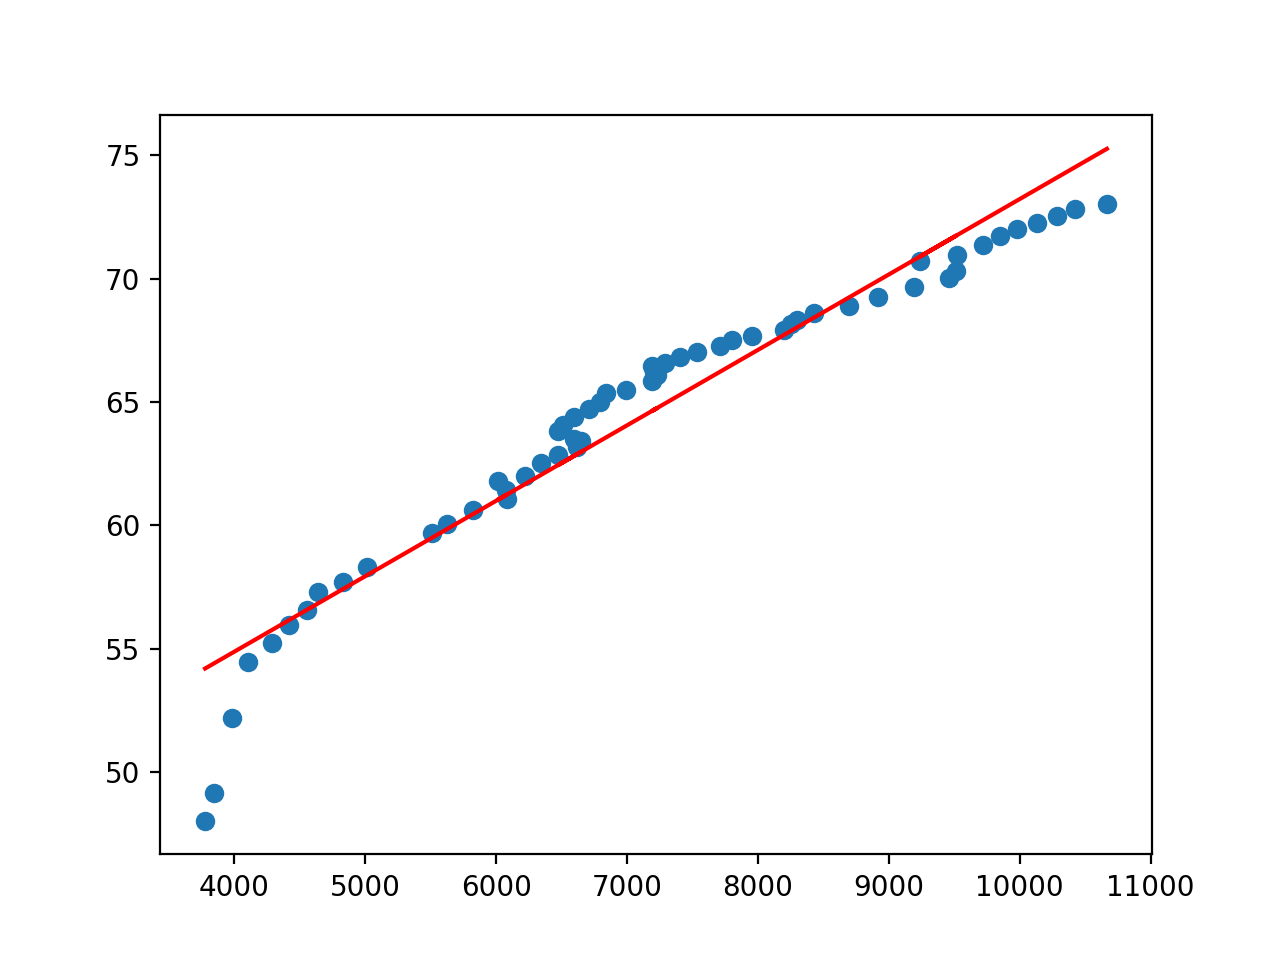

In [107]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

<IPython.core.display.Javascript object>


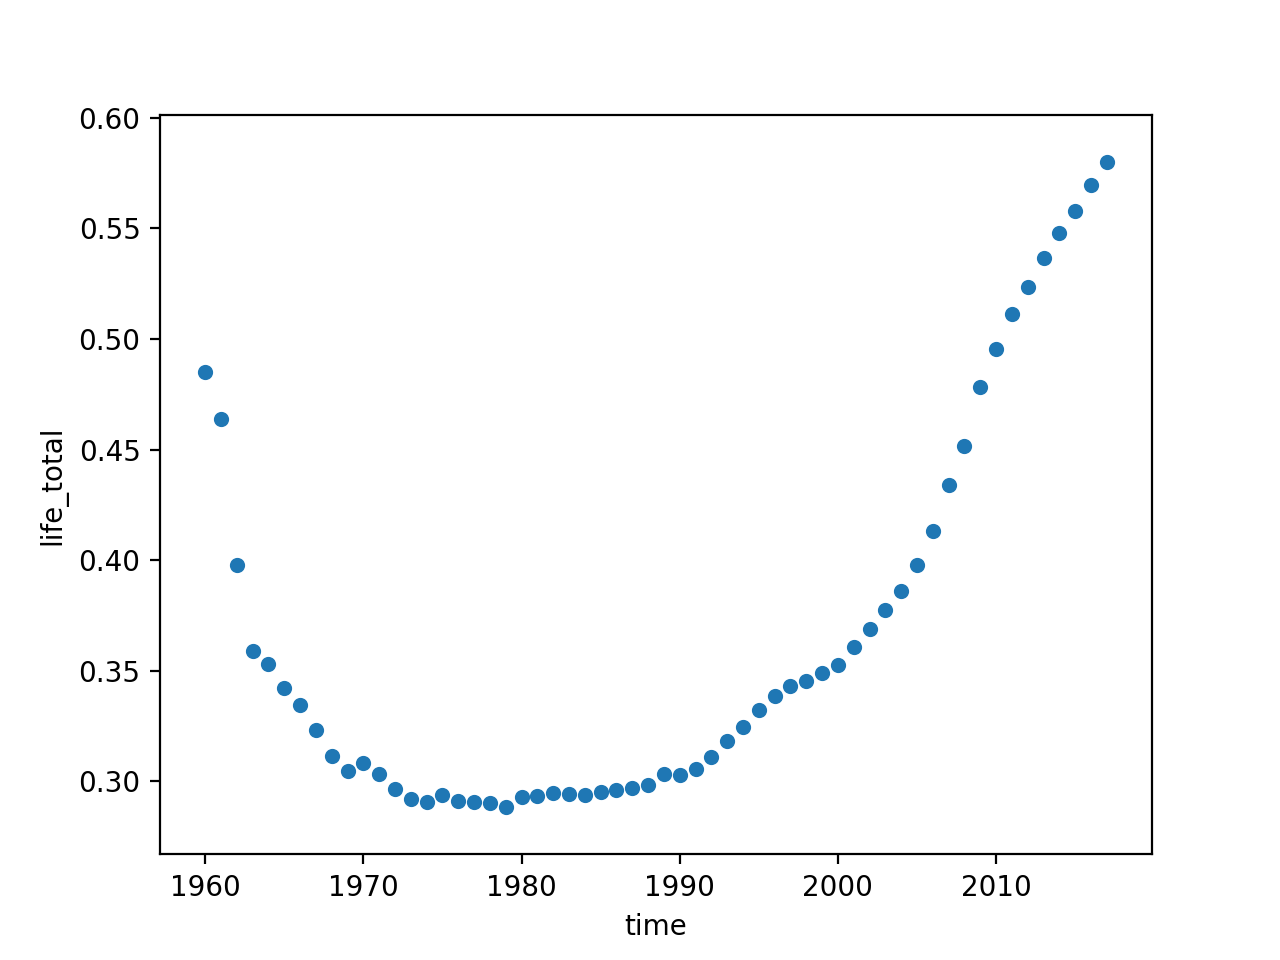

In [108]:
cov_data = data[["time", "gdp_total", "life_total"]].groupby("time").corr()
cov_data = cov_data.reset_index()[["time","life_total", "level_1"]]
cov_data = cov_data.loc[cov_data["level_1"] == "gdp_total"]
cov_data.plot.scatter(x = "time", y = "life_total")

In [131]:
childdata = pd.read_csv("data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv")
borndata = pd.read_csv("data/ddf--datapoints--new_births_total_number_estimated--by--geo--time.csv")
child_gdp_data = pd.merge(gdpdata, childdata, on = ["geo", "time"], how = "inner" )
child_gdp_data = pd.merge(child_gdp_data, populationdata, on = ["geo", "time"], how = "inner")
child_gdp_data = pd.merge(child_gdp_data, borndata, on = ["geo", "time"], how = "inner")
child_gdp_data["total_mortality"] = child_gdp_data["new_births_total_number_estimated"] * child_gdp_data["child_mortality_0_5_year_olds_dying_per_1000_born"] / 1000
child_gdp_data["total_gdp"] = child_gdp_data["gdppercapita_us_inflation_adjusted"]* child_gdp_data["population_total"]

In [132]:
child_gdp_data["total"] = 

KeyError: 'total'

In [117]:
child_gdp_data.head(5)

,geo,time,gdppercapita_us_inflation_adjusted,child_mortality_0_5_year_olds_dying_per_1000_born,population_total
0,afg,2002,364.57057,122.2,21979923
1,afg,2003,376.75871,118.3,23064851
2,afg,2004,364.09544,114.4,24118979
3,afg,2005,389.41636,110.3,25070798
4,afg,2006,397.98590,106.3,25893450
